In [2]:
import re
import pandas as pd
import numpy as np

In [3]:
# special characters
text = "helllo! are you free @3pm?"
special_chars = re.findall(r"[^a-zA-Z0-9\s]", text)
print("special characters:", special_chars)

special characters: ['!', '@', '?']


In [4]:
# URLs
text = "visit our website at https://example.com!"
urls = re.findall(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", text)
print("urls:", urls)

urls: ['https://example.com!']


In [5]:
## unnecessary whitespace
text = "This   sentence   has   extra   spaces."
unnecessary_whitespace = re.findall(r"\s{2,}", text)
print("Unnecessary whitespace:", unnecessary_whitespace)

Unnecessary whitespace: ['   ', '   ', '   ', '   ']


In [1]:
text = "This is a sample sentence."
tokens = text.split()
print(tokens)

['This', 'is', 'a', 'sample', 'sentence.']


In [3]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

text = "This is a sample sentence."
tokens = word_tokenize(text)
print(tokens)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\looka\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


['This', 'is', 'a', 'sample', 'sentence', '.']


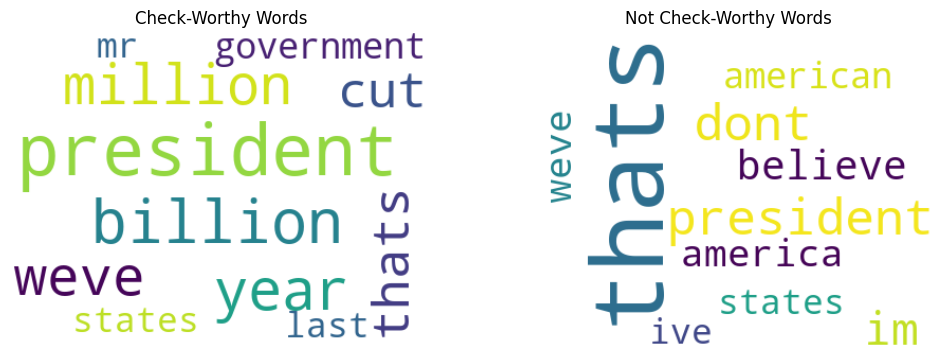

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define the word frequencies as dictionaries
check_worthy_words = {
    'president': 481, 'billion': 339, 'year': 307, 'million': 281, 'weve': 270, 
    'thats': 243, 'cut': 232, 'government': 222, 'last': 214, 'mr': 208, 'states': 205,
    # Add more words as needed...
}
not_check_worthy_words = {
    'thats': 1013, 'president': 966, 'dont': 960, 'im': 809, 'believe': 632, 
    'weve': 560, 'america': 551, 'american': 501, 'states': 469, 'ive': 462,
    # Add more words as needed...
}

# Create word clouds
check_worthy_wc = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(check_worthy_words)
not_check_worthy_wc = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(not_check_worthy_words)

# Plot the word clouds
plt.figure(figsize=(12, 6))

# Display check-worthy word cloud
plt.subplot(1, 2, 1)
plt.imshow(check_worthy_wc, interpolation='bilinear')
plt.title('Check-Worthy Words')
plt.axis('off')

# Display not check-worthy word cloud
plt.subplot(1, 2, 2)
plt.imshow(not_check_worthy_wc, interpolation='bilinear')
plt.title('Not Check-Worthy Words')
plt.axis('off')

plt.show()


In [4]:
df = pd.DataFrame({
    'big_numbers': np.random.randint(1e3, 1e5, size=1000000),
    'small_numbers': np.random.randint(1, 100, size = 1000000)
})

In [5]:
df

,big_numbers,small_numbers
0,57484,63
1,3993,61
2,99393,13
3,13708,12
4,44644,99
...,...,...
999995,53939,39
999996,8126,97
999997,98191,36
999998,14610,77


In [6]:
print('before optimization: ', df.memory_usage(deep=True).sum() / 1e6, "MB")

before optimization:  8.000128 MB


In [7]:
df['big_numbers'] = df['big_numbers'].astype('int32')
df['small_numbers'] = df['small_numbers'].astype('int8')

In [8]:
print('after optimization: ', df.memory_usage(deep=True).sum() / 1e6, "MB")

after optimization:  5.000128 MB


In [2]:
from transformers import pipeline

In [3]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\looka\OneDrive\Documents\Thesis\master_thesis\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\looka\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [19]:
data = {
    'text': [
        "The economy is improving due to recent policies.",
        "The president attended the ceremony.",
        "Healthcare costs are rising rapidly.",
        "Scientists have discovered water on Mars.",
        "This year will be one of the hottest on record.",
        "I love this product",
        "I hate this product",
        "This product is okay"
    ],
    'label': [
        'check-worthy',
        'not check-worthy',
        'check-worthy',
        'check-worthy',
        'not check-worthy',
        'check-worthy',
        'check-worthy',
        'not check-worthy'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

                                               text             label
0  The economy is improving due to recent policies.      check-worthy
1              The president attended the ceremony.  not check-worthy
2              Healthcare costs are rising rapidly.      check-worthy
3         Scientists have discovered water on Mars.      check-worthy
4   This year will be one of the hottest on record.  not check-worthy
5                               I love this product      check-worthy
6                               I hate this product      check-worthy
7                              This product is okay  not check-worthy


In [20]:
def get_sentiment(text):
    result = sentiment_pipeline(text)
    return result[0]['label'], result[0]['score']

In [21]:
df['sentiment_label'], df['sentiment_score'] = zip(*df['text'].apply(get_sentiment))

In [22]:
df

,text,label,sentiment_label,sentiment_score
0,The economy is improving due to recent policies.,check-worthy,POSITIVE,0.999346
1,The president attended the ceremony.,not check-worthy,POSITIVE,0.999305
2,Healthcare costs are rising rapidly.,check-worthy,NEGATIVE,0.916003
3,Scientists have discovered water on Mars.,check-worthy,POSITIVE,0.996215
4,This year will be one of the hottest on record.,not check-worthy,POSITIVE,0.999844
5,I love this product,check-worthy,POSITIVE,0.999879
6,I hate this product,check-worthy,NEGATIVE,0.999754
7,This product is okay,not check-worthy,POSITIVE,0.999834


In [9]:
from transformers import AutoTokenizer, RobertaForSequenceClassification
import torch

In [17]:
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")
model = RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")

In [18]:
inputs  = tokenizer("Hello, my dog is cute", return_tensors = "pt")
outputs = model(**inputs)
#last_hidden_states = outputs.last_hidden_state 


In [19]:
scores = torch.softmax(outputs.logits, dim = 1)
print(scores)

tensor([[0.0151, 0.9208, 0.0240, 0.0401]], grad_fn=<SoftmaxBackward0>)


In [1]:
from sklearn.preprocessing import LabelEncoder

# Example binary labels
labels = ['yes', 'no', 'yes', 'no', 'yes']

# Initialize the label encoder
encoder = LabelEncoder()

# Fit and transform the labels to numerical values
numeric_labels = encoder.fit_transform(labels)
print(numeric_labels)


[1 0 1 0 1]


In [7]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [8]:
text = "Elon Musk, the CEO of Tesla, visited Paris in 2023 for a business conference."
doc = nlp(text)
entities = [(ent.text, ent.label_) for ent in doc.ents]
print(entities)

[('Elon Musk', 'PERSON'), ('Tesla', 'ORG'), ('Paris', 'GPE'), ('2023', 'DATE')]


In [23]:
print(entities[0].label_)

AttributeError: 'str' object has no attribute 'label_'

In [24]:
from collections import Counter

In [10]:
texts = [
    "Elon Musk is the CEO of Tesla.",
    "The Apple event is scheduled for September 2023.",
    "Paris is a beautiful city."
]


In [11]:
entities = []
for text in texts:
    doc = nlp(text)
    entities.extend([ent.text for ent in doc.ents])

entity_counts = Counter(entities)
print(entity_counts)

Counter({'Elon Musk': 1, 'Tesla': 1, 'Apple': 1, 'September 2023': 1, 'Paris': 1})


In [50]:


# Example dataset
data = {
    'text': [
        "Barack Obama was born in Honolulu.",
        "Tesla is headquartered in Palo Alto, California.",
        "Apple Inc. was founded by Steve Jobs in Cupertino."
    ]
}

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    entities = {
        "names": 0,
        "organizations": 0,
        "locations": 0,
        "dates": 0,
        "verbs": 0
    }
    
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            entities["names"] += 1
        elif ent.label_ == "ORG":
            entities["organizations"] += 1
        elif ent.label_ == "GPE":  # GPE stands for countries, cities, and states
            entities["locations"] += 1
        elif ent.label_ == "DATE":
            entities["dates"] += 1
            
    for token in doc:
        if token.pos_ == "VERB":
            entities['verbs'] += 1
    
    return entities

# Apply the function to the 'text' column and expand the dictionary into separate columns
entity_counts = df['text'].apply(extract_entities).apply(pd.Series)

# Join the extracted entities with the original dataframe
df = pd.concat([df, entity_counts], axis=1)

# Display the resulting dataframe
print(df)


                                                text  names  organizations  \
0                 Barack Obama was born in Honolulu.      1              0   
1   Tesla is headquartered in Palo Alto, California.      0              1   
2  Apple Inc. was founded by Steve Jobs in Cupert...      1              1   

   locations  dates  verbs  
0          1      0      1  
1          2      0      1  
2          1      0      1  


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
data = {
    'text': [
        "Barack Obama was born in Honolulu.",
        "Tesla is headquartered in Palo Alto, California.",
        "Apple Inc. was founded by Steve Jobs in Cupertino."
        
    ],
    'checkworthiness': [1, 0, 1]
}

In [43]:
df = pd.DataFrame(data)

In [44]:
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(df['text'])

In [45]:
y = df['checkworthiness']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Confusion Matrix:
[[0 0]
 [1 0]]


C:\Users\looka\OneDrive\Documents\Thesis\master_thesis\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\looka\OneDrive\Documents\Thesis\master_thesis\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\looka\OneDrive\Documents\Thesis\master_thesis\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [53]:
doc = nlp(data['text'][0])

In [54]:
print(doc)

Barack Obama was born in Honolulu.


In [57]:
for token in doc:
    print(token.pos_)

PROPN
PROPN
AUX
VERB
ADP
PROPN
PUNCT


In [22]:
data = {
    'text': [
        ["'went'"],
        [],
        ["'is'", "'beleive'"],
        ["'are'", "'allowed'"],
         ["'amaricans'", "'is'"],
         ["'indicated'"],
        ["'m", "'confirmed'"]
    ]
   
}

# Create DataFrame
df = pd.DataFrame(data)
df

,text
0,['went']
1,[]
2,"['is', 'beleive']"
3,"['are', 'allowed']"
4,"['amaricans', 'is']"
5,['indicated']
6,"['m, 'confirmed']"


In [23]:
def remove_aux_verbs(action_verbs):
    aux_verb = [
    # Primary auxiliary verbs
    "'am'", "'m", "'is'", "'s", "'are'", "'was'", "'were'", "'being'", "'been'", 
    "'have'", "'ve", "'has'", "'had'", 
    "'do'", "'does'", "'did'",

    # Modal auxiliary verbs
    "'can'", "'could'", "'may'", "'might'", "'must'", 
    "shall", "should", "will", "'ll", "'would'",

    # Semi-modal auxiliary verbs
    "'dare'", "'need'", "'ought to'", "'used to'"
    ]
    if not isinstance(action_verbs, list):
        return []
    
    verb = [x for x in action_verbs if x not in aux_verb]
    return verb



In [24]:
df['actions'] = df['text'].apply(remove_aux_verbs)

In [25]:
df

,text,actions
0,['went'],['went']
1,[],[]
2,"['is', 'beleive']",['beleive']
3,"['are', 'allowed']",['allowed']
4,"['amaricans', 'is']",['amaricans']
5,['indicated'],['indicated']
6,"['m, 'confirmed']",['confirmed']
